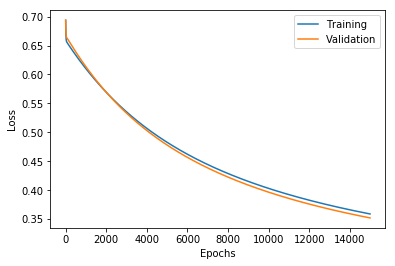

Accuracy score on validation set: 0.9298245614035088 

Accuracy score on test set: 0.8245614035087719
Precision score on test set: 0.9230769230769231
Recall score on test set: 0.5714285714285714


In [6]:
# Lan Le - UB Person Number: 50322056
# CSE574 Project 1: Logistic Regression



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn import preprocessing


# save file path to variable
base_dir = os.path.dirname('__file__')
wdbc_file_path = os.path.join(base_dir, 'input/wdbc.csv')

# read the data and store in Pandas Dataframe
wdbc_data = pd.read_csv(wdbc_file_path)

# select prediction target and features
feature_X = wdbc_data.iloc[ : , 2 :]
target_y = wdbc_data.iloc[ : , 1]

# replace labels with 0s and 1s
target_y = target_y.replace('M' , 1)
target_y = target_y.replace('B' , 0)

# split data into training, validation, and test data
train_X, test_val_X, train_y, test_val_y = train_test_split(feature_X, target_y, test_size = 0.2, random_state = 0)
val_X, test_X, val_y, test_y = train_test_split(test_val_X, test_val_y, test_size = 0.5, random_state = 0)

# normalize the dataset
train_X = preprocessing.normalize(train_X)
norm_val_X = preprocessing.normalize(val_X)

# define Sigmoid function
def sigmoid(z):
    return (1/(1 + np.exp(-z)))

# train using logistic regression
train_X = train_X.T
train_y = train_y.values.reshape(1, train_y.shape[0])
norm_val_X = norm_val_X.T
val_y = val_y.values.reshape(1, val_y.shape[0])

train_losstrack = []
val_losstrack = []
learning_rate = 0.1
epochs = 15000
m = train_X.shape[1]
val_m = norm_val_X.shape[1]
w = np.random.randn(train_X.shape[0], 1)*0.01
b = 0

for epoch in range(epochs):
    z = np.dot(w.T, train_X) + b
    p = sigmoid(z)
    train_cost = -np.sum(np.multiply(np.log(p), train_y) + np.multiply((1 - train_y), np.log(1 - p)))/m
    train_losstrack.append(np.squeeze(train_cost))
    
    val_z = np.dot(w.T, norm_val_X) + b
    val_p = sigmoid(val_z)
    val_cost = -np.sum(np.multiply(np.log(val_p), val_y) + np.multiply((1 - val_y), np.log(1 - val_p)))/val_m
    val_losstrack.append(np.squeeze(val_cost))
    
    dz = p - train_y
    dw = (1 / m) * np.dot(train_X, dz.T)
    db = (1 / m) * np.sum(dz)
    w = w - learning_rate * dw
    b = b - learning_rate * db

plt.plot(train_losstrack, label='Training')
plt.plot(val_losstrack, label='Validation')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# measure performance on validation set
val_X = val_X.T
val_z = np.dot(w.T, val_X) + b
val_p = sigmoid(val_z)

# replace prediction values with 0s and 1s
val_p = (val_p > 0.5).astype(int)

print('Accuracy score on validation set:', accuracy_score(val_y.T, val_p.T), '\n')

# move on to evaluate performance on the testing set
test_X = test_X.T
test_y = test_y.values.reshape(1, test_y.shape[0])
test_z = np.dot(w.T, test_X) + b
test_p = sigmoid(test_z)

test_p = (test_p > 0.5).astype(int)
print('Accuracy score on test set:', accuracy_score(test_y.T, test_p.T))
print('Precision score on test set:', precision_score(test_y.T, test_p.T))
print('Recall score on test set:', recall_score(test_y.T, test_p.T))